# Exercício 1

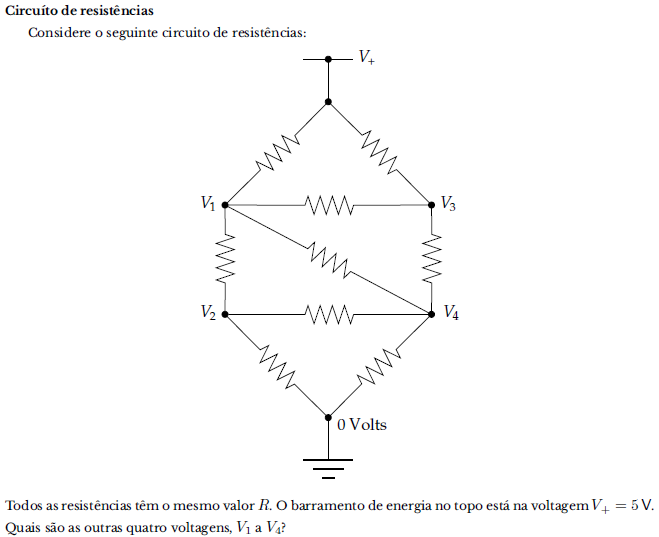
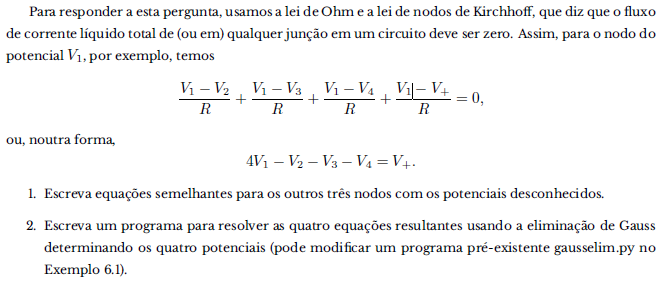

[Página do Notion](https://www.notion.so/guilhermebaos/9-Elimina-o-de-Gauss-e94602c720e546b6b5f049165144fcce?pvs=4).

In [1]:
import numpy as np

## Alínea 1

Temos o seguinte sistema de equações:

$$
\begin{cases}
4V_1 - V_2 - V_3 - V_4 = V_+
\\\\
3V_3 - V_1 - V_4 = V_+
\\\\
3V_2 - V_1 - V_4 = 0
\\\\
4V_4 - V_1 - V_2 - V_3 = 0
\end{cases}
$$

# Alínea 2

In [2]:
def gausselim(Ao: np.ndarray, bbo: np.ndarray) -> np.ndarray:
    """
        Resolve o sistema de D equações definido por A * xx = bb usando eliminação gaussiana.
    """

    # Evitar side effects
    A = np.copy(Ao)
    bb = np.copy(bbo)

    D = bb.size

    # Eliminação Gaussiana
    for i in range(D-1):
        for j in range(i+1, D):
            coef = A[j][i] / A[i][i]
            A[j] -= A[i] * coef
            bb[j] -= bb[i] * coef

    # Substituição Regressiva
    xx = np.zeros(D)
    xx[-1] = bb[-1] / A[D-1, D-1]
    for i in range(D-1, -1, -1):
        xx[i] = (bb[i] - (A[i][i+1:] @ xx[i+1:])) / A[i][i]
    
    return xx

In [3]:
# Parâmetros
VP = 5

A = np.array([[4, -1, -1, -1], [-1, 0, 3, -1], [-1, 3, 0, -1], [-1, -1, -1, 4]], dtype=np.float64)
bb = np.array([VP, VP, 0, 0], dtype=np.float64)

vv = gausselim(np.copy(A), np.copy(bb))
print(vv)

[3.         1.66666667 3.33333333 2.        ]


Temos a seguinte solução:

$$
\begin{cases}
V_1 = 3\text V
\\\\
V_2 = 5/3\text V
\\\\
V_3 = 10/3\text V
\\\\
V_4 = 2\text V
\end{cases}
$$


Vamos verificar a nossa solução!

In [4]:
vv = np.linalg.solve(A, bb)
print(vv)

[3.         1.66666667 3.33333333 2.        ]
